
一些说明：

1. ignore the feature with too many na?

it varies at times. when the feature gives important information, even though it has 50% or more na percentage, you should keep that feature and it will performs well; if the feature is not so important, generally, 20~30% is the allowed percentage.

2. should remove the skewed y value?

unknown

3. feature mapping?

multiply the feature to create new feature. such as length * midth = size

4. how to deal with categorical feature

https://zhuanlan.zhihu.com/p/480609142
https://blog.csdn.net/sinat_33231573/article/details/112175522

当使用数字对分类变量继续宁编码时，会误导模型，让模型误以为特征的编码和y有数量增长的关系。其实并没有。

factorize，先处理缺失值再处理ordinal，因为factorize会把nan也当作一种值？



https://github.com/pandas-profiling/pandas-profiling

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import pandas_profiling
pd.set_option('display.max_columns', None)


import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,mean_squared_log_error
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn import set_config
from sklearn.model_selection import train_test_split

from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, LassoLars, SGDRegressor, Ridge, LogisticRegression, BayesianRidge
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor

set_config(display='diagram') 

In [49]:
df = pd.read_csv('./train.csv')

In [50]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
df.profile_report()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## overall

know about the overall situation:
1. y distribution
2. correlation between features
3. correlation between feature and y

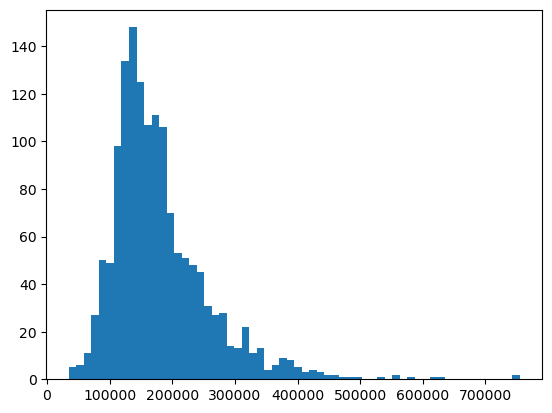

In [7]:
plt.hist(df['SalePrice'],bins=60)
plt.show()

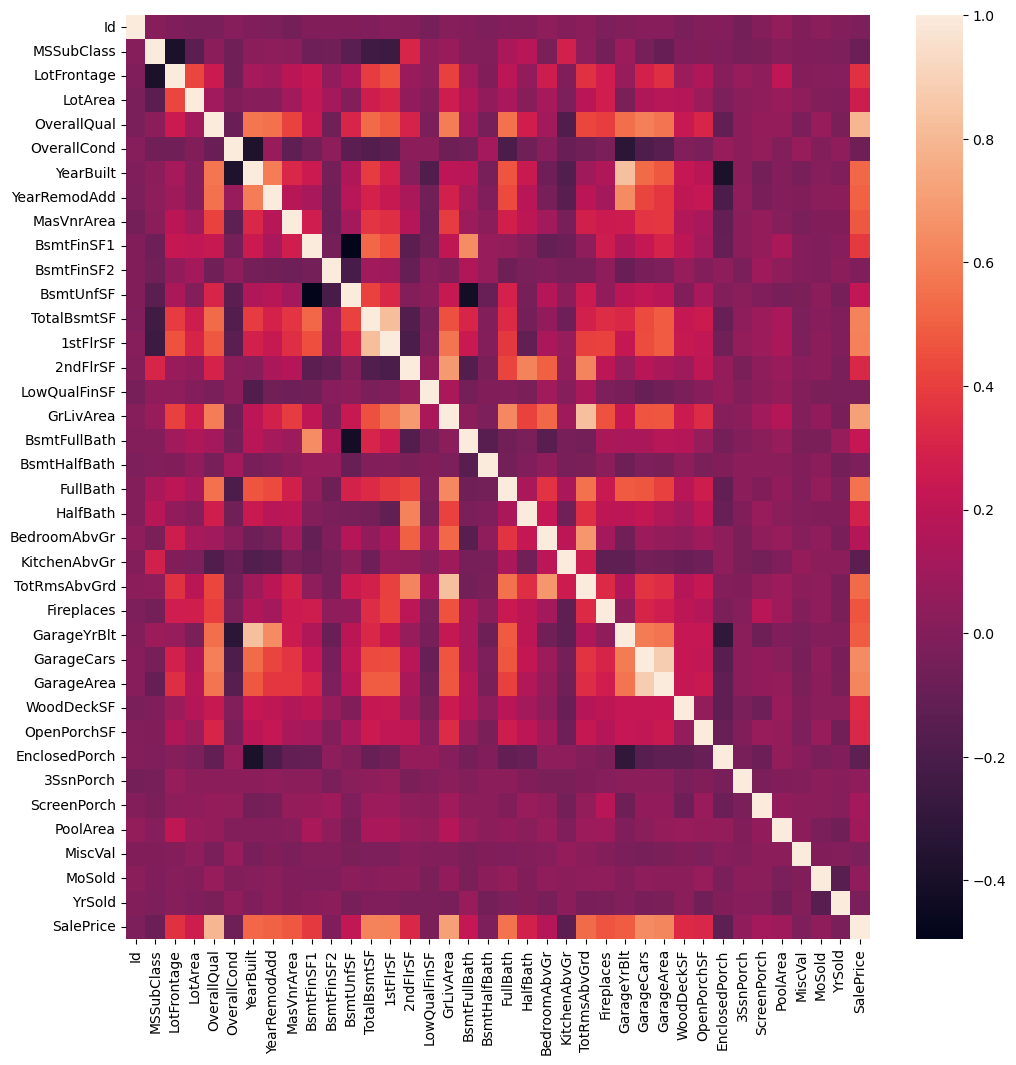

In [10]:
corrmat = df.corr()
plt.subplots(figsize = (12,12))
sns.heatmap(corrmat)
plt.show()

<AxesSubplot:>

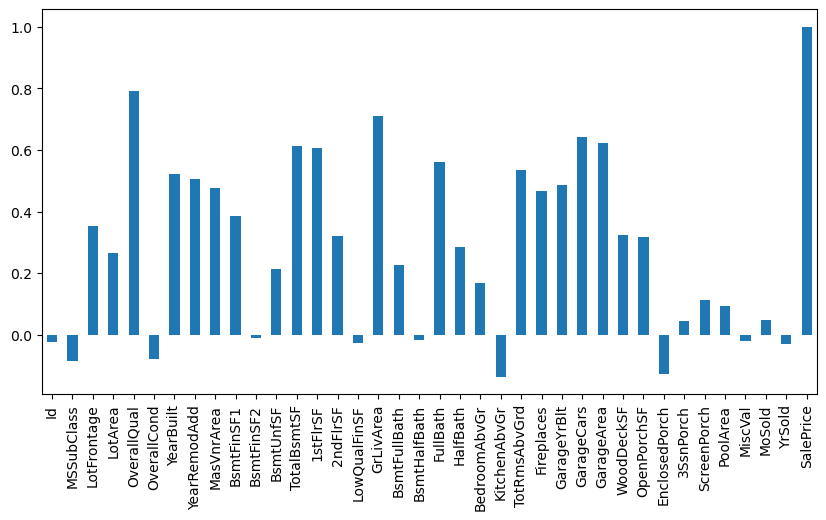

In [14]:
corrmat['SalePrice'].plot(kind='bar',figsize=(10,5))

In [15]:
# columns 1-16

In [19]:
df1_16 = df[df.columns[1:16]]
df1_16.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam


In [26]:
df1_16.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MSSubClass    1460 non-null   int64  
 1   MSZoning      1460 non-null   object 
 2   LotFrontage   1201 non-null   float64
 3   LotArea       1460 non-null   int64  
 4   Street        1460 non-null   object 
 5   Alley         91 non-null     object 
 6   LotShape      1460 non-null   object 
 7   LandContour   1460 non-null   object 
 8   Utilities     1460 non-null   object 
 9   LotConfig     1460 non-null   object 
 10  LandSlope     1460 non-null   object 
 11  Neighborhood  1460 non-null   object 
 12  Condition1    1460 non-null   object 
 13  Condition2    1460 non-null   object 
 14  BldgType      1460 non-null   object 
dtypes: float64(1), int64(2), object(12)
memory usage: 171.2+ KB


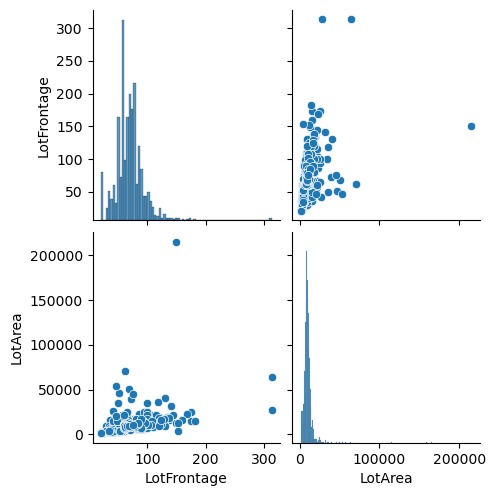

In [21]:
sns.pairplot(df1_16[['LotFrontage','LotArea']])

我也不知道什么样的散点图才算得上是好的特征。

<AxesSubplot:xlabel='LotArea', ylabel='SalePrice'>

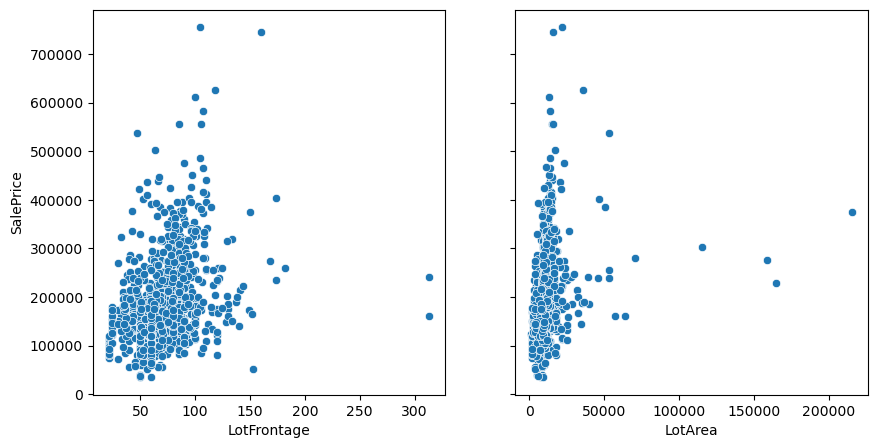

In [25]:
fig,axes = plt.subplots(1,2,figsize = (10,5),sharey =True)
sns.scatterplot(ax=axes[0],x=df['LotFrontage'], y=df['SalePrice'])
sns.scatterplot(ax=axes[1],x=df['LotArea'], y=df['SalePrice'])

## numerical feature

年默认都当作数字

In [35]:
df.select_dtypes(['float64','int64']).columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
from numpy import asarray
from sklearn.preprocessing import OrdinalEncoder

data = asarray([['red'],['green'],['blue'],['blue']])

In [6]:
print(data)

[['red']
 ['green']
 ['blue']
 ['blue']]


In [19]:
data = asarray(df['ExterQual'].values)

In [6]:
df_test = pd.DataFrame()
df_test['BsmtCond'] = pd.factorize(df['BsmtCond'] )[0]
df_test['BsmtCond'].count()

1460

<AxesSubplot:xlabel='BsmtCond', ylabel='SalePrice'>

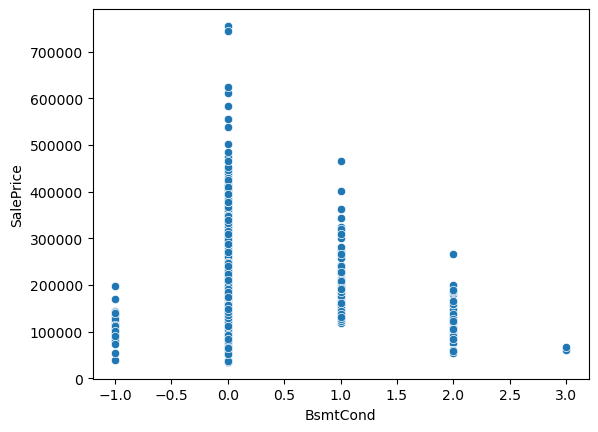

In [14]:
df_test['BsmtCond'].value_counts()

sns.scatterplot(x=df_test['BsmtCond'], y=df['SalePrice'])

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

#先把几个ordinal 转化成数字；nan设置为-1；之后再考虑如何处理-1

#several ways to deal with the nan in categorical feature

https://medium.com/analytics-vidhya/ways-to-handle-categorical-column-missing-data-its-implementations-15dc4a56893


1. frequent categorical imputation
relacing nan values with the most frequent category

disadvantage: 

if the features having too many nan, it will cause bias, also it distorts the relation of the most frequent label.

2. create a new column to impute nan category

disad:

curse of dimensionality, and missing data should be large enough.

3. create a new category for nan values

In [19]:
#首先看下需要处理成ordinal的每个特征的空值率；还是继续处理吧。nan记录为-1
string = """ExterQual
ExterCond
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageQual
GarageCond
PavedDrive
PoolQC
Fence"""

cat_list = string.split('\n')
df_cat_ord = df[cat_list]
df_cat_ord.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ExterQual     1460 non-null   object
 1   ExterCond     1460 non-null   object
 2   BsmtQual      1423 non-null   object
 3   BsmtCond      1423 non-null   object
 4   BsmtExposure  1422 non-null   object
 5   BsmtFinType1  1423 non-null   object
 6   BsmtFinType2  1422 non-null   object
 7   HeatingQC     1460 non-null   object
 8   CentralAir    1460 non-null   object
 9   Electrical    1459 non-null   object
 10  KitchenQual   1460 non-null   object
 11  Functional    1460 non-null   object
 12  FireplaceQu   770 non-null    object
 13  GarageQual    1379 non-null   object
 14  GarageCond    1379 non-null   object
 15  PavedDrive    1460 non-null   object
 16  PoolQC        7 non-null      object
 17  Fence         281 non-null    object
dtypes: object(18)
memory usage: 205.4+ KB


In [20]:
df_test['BsmtCond'] = pd.factorize(df['BsmtCond'] )[0]

for i in cat_list:
    df[i] = pd.factorize(df[i])[0]
    
df[cat_list]

,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageQual,GarageCond,PavedDrive,PoolQC,Fence
0,0,0,0,0,0,0,0,0,0,0,0,0,-1,0,0,0,-1,-1
1,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,-1,-1
2,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,-1,-1
3,1,0,1,1,0,1,0,1,0,0,0,0,1,0,0,0,-1,-1
4,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1,0,0,0,0,2,0,0,0,0,1,0,0,0,0,0,-1,-1
1456,1,0,0,0,0,1,3,2,0,0,1,1,0,0,0,0,-1,0
1457,2,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,-1,2
1458,1,0,1,0,2,0,3,1,0,2,0,0,-1,0,0,0,-1,-1


In [24]:
cat_list

['ExterQual',
 'ExterCond',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence']

In [51]:
conv_dict1 = {
    "Ex":0,
    "Gd":1,
    "TA":2,
    "Fa":3,
    "Po":4            
}


cat_type1 = ['ExterQual',
 'ExterCond',
 'BsmtQual',
 'BsmtCond',
'HeatingQC','KitchenQual','FireplaceQu',
 'GarageQual',
 'GarageCond','PoolQC','BsmtExposure']

for i in cat_type1:
    df[i].replace(conv_dict1,inplace = True)
    

In [52]:
conv_dict2 = {
    "Gd":0,
    "Av":1,
    "Mn":2,
    "No":3
}
cat_type2 = ['BsmtExposure']

for i in cat_type2:
    df[i].replace(conv_dict2,inplace = True)
    

In [53]:
conv_dict3 = {
    "GLQ":0,
    "ALQ":1,
    "BLQ":2,
    "Rec":3,
    "LwQ":4,
    "Unf":5
    
}
cat_type3 = ['BsmtFinType1','BsmtFinType2']

for i in cat_type3:
    df[i].replace(conv_dict3,inplace = True)
    

In [54]:
conv_dict4 = {
    "Y":1,
    "N":0
    
}
cat_type4 = ['CentralAir']

for i in cat_type4:
    df[i].replace(conv_dict4,inplace = True)
    

In [55]:
conv_dict5 = {
    "SBrkr":0,
    "FuseA":1,
    "FuseF":2,
    "FuseP":3,
    "Mix":4      
}

df['Electrical'].replace(conv_dict5,inplace = True)
    

In [56]:
conv_dict6 = {
    "Typ":0,
    "Min1":1,
    "Min2":2,
    "Mod":3,
    "Maj1":4,
    "Maj2":5,
    "Sev":6,
    "Sal":7
}

df['Functional'].replace(conv_dict6,inplace = True)

In [57]:
conv_dict7 = {
    "Y":0,
    "P":1,
    "N":2
}

df['PavedDrive'].replace(conv_dict7,inplace = True)

In [58]:
conv_dict8 = {
    "GdPrv":0,
    "MnPrv":1,
    "GdWo":2,
    "MnWw":3
}

df['Fence'].replace(conv_dict8,inplace = True)

In [64]:
#ordinal category 处理完成, 一共18个。
df[cat_list]

,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageQual,GarageCond,PavedDrive,PoolQC,Fence
0,1,2,1.0,2.0,3.0,0.0,5.0,0,1,0.0,1,0,NaN,2.0,2.0,0,NaN,NaN
1,2,2,1.0,2.0,1.0,1.0,5.0,0,1,0.0,2,0,2.0,2.0,2.0,0,NaN,NaN
2,1,2,1.0,2.0,2.0,0.0,5.0,0,1,0.0,1,0,2.0,2.0,2.0,0,NaN,NaN
3,2,2,2.0,1.0,3.0,1.0,5.0,1,1,0.0,1,0,1.0,2.0,2.0,0,NaN,NaN
4,1,2,1.0,2.0,1.0,0.0,5.0,0,1,0.0,1,0,2.0,2.0,2.0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,2,2,1.0,2.0,3.0,5.0,5.0,0,1,0.0,2,0,2.0,2.0,2.0,0,NaN,NaN
1456,2,2,1.0,2.0,3.0,1.0,3.0,2,1,0.0,2,1,2.0,2.0,2.0,0,NaN,1.0
1457,0,1,2.0,1.0,3.0,0.0,5.0,0,1,0.0,1,0,1.0,2.0,2.0,0,NaN,0.0
1458,2,2,2.0,2.0,2.0,0.0,3.0,1,1,1.0,1,0,NaN,2.0,2.0,0,NaN,NaN


### 接下来开始挑选变量

1. 去掉自相关变量；

多大的相关系数才算相关？

2. 挑选和y有关的，去掉和y无关的

多大才算和y有关？

In [65]:
#numerical

num_string = """LotFrontage
LotArea
OverallQual
OverallCond
YearBuilt
YearRemodAdd
MasVnrArea
BsmtFinSF1
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
1stFlrSF
2ndFlrSF
LowQualFinSF
GrLivArea
BsmtFullBath
BsmtHalfBath
FullBath
HalfBath
BedroomAbvGr
KitchenAbvGr
TotRmsAbvGrd
Fireplaces
GarageYrBlt
GarageCars
GarageArea
WoodDeckSF
OpenPorchSF
EnclosedPorch
3SsnPorch
ScreenPorch
PoolArea
MiscVal
MoSold
YrSold"""

num_list = num_string.split('\n')

df[num_list]

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008
1,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007
2,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008
3,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006
4,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,7917,6,5,1999,2000,0.0,0,0,953,953,953,694,0,1647,0,0,2,1,3,1,7,1,1999.0,2,460,0,40,0,0,0,0,0,8,2007
1456,85.0,13175,6,6,1978,1988,119.0,790,163,589,1542,2073,0,0,2073,1,0,2,0,3,1,7,2,1978.0,2,500,349,0,0,0,0,0,0,2,2010
1457,66.0,9042,7,9,1941,2006,0.0,275,0,877,1152,1188,1152,0,2340,0,0,2,0,4,1,9,2,1941.0,1,252,0,60,0,0,0,0,2500,5,2010
1458,68.0,9717,5,6,1950,1996,0.0,49,1029,0,1078,1078,0,0,1078,1,0,1,0,2,1,5,0,1950.0,1,240,366,0,112,0,0,0,0,4,2010


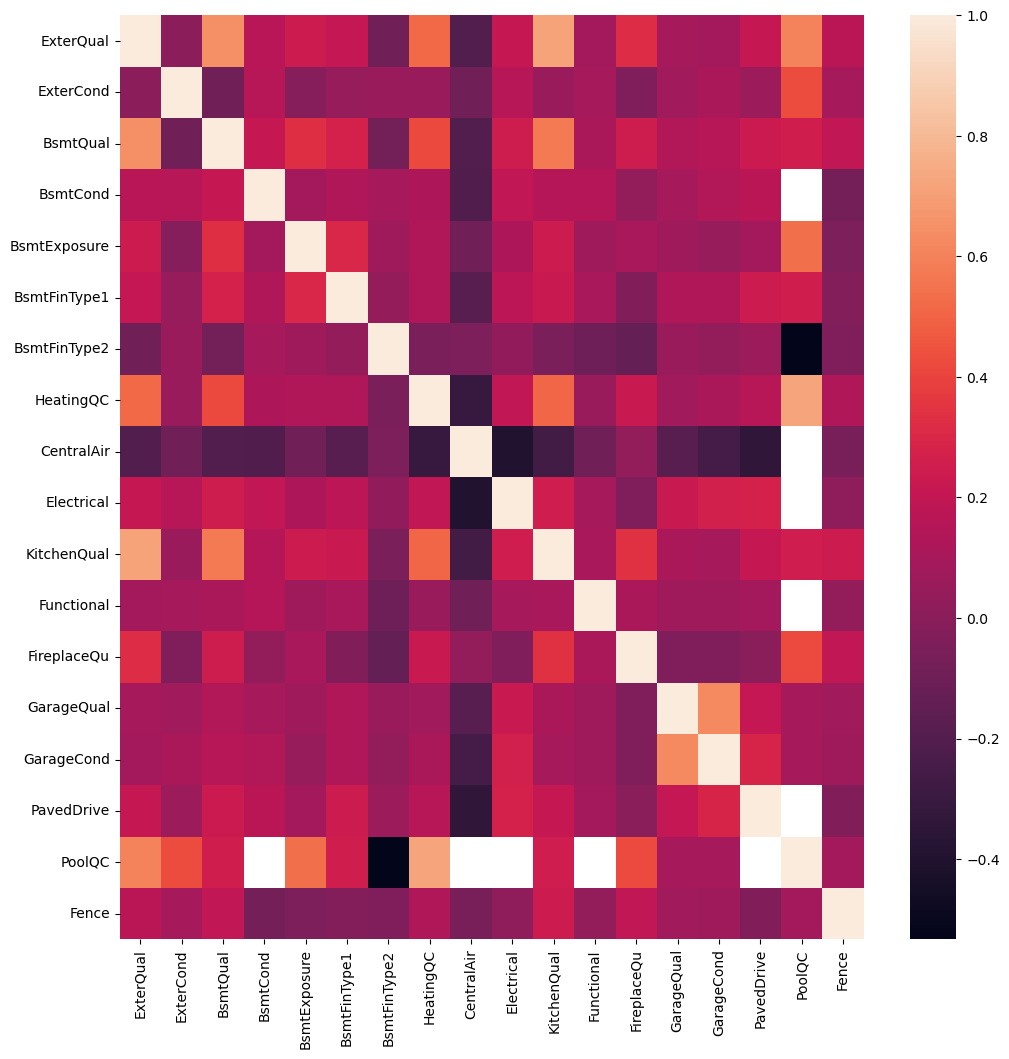

In [63]:
#ordinal cate corr
corrmat = df[cat_list].corr()
plt.subplots(figsize = (12,12))
sns.heatmap(corrmat)
plt.show()

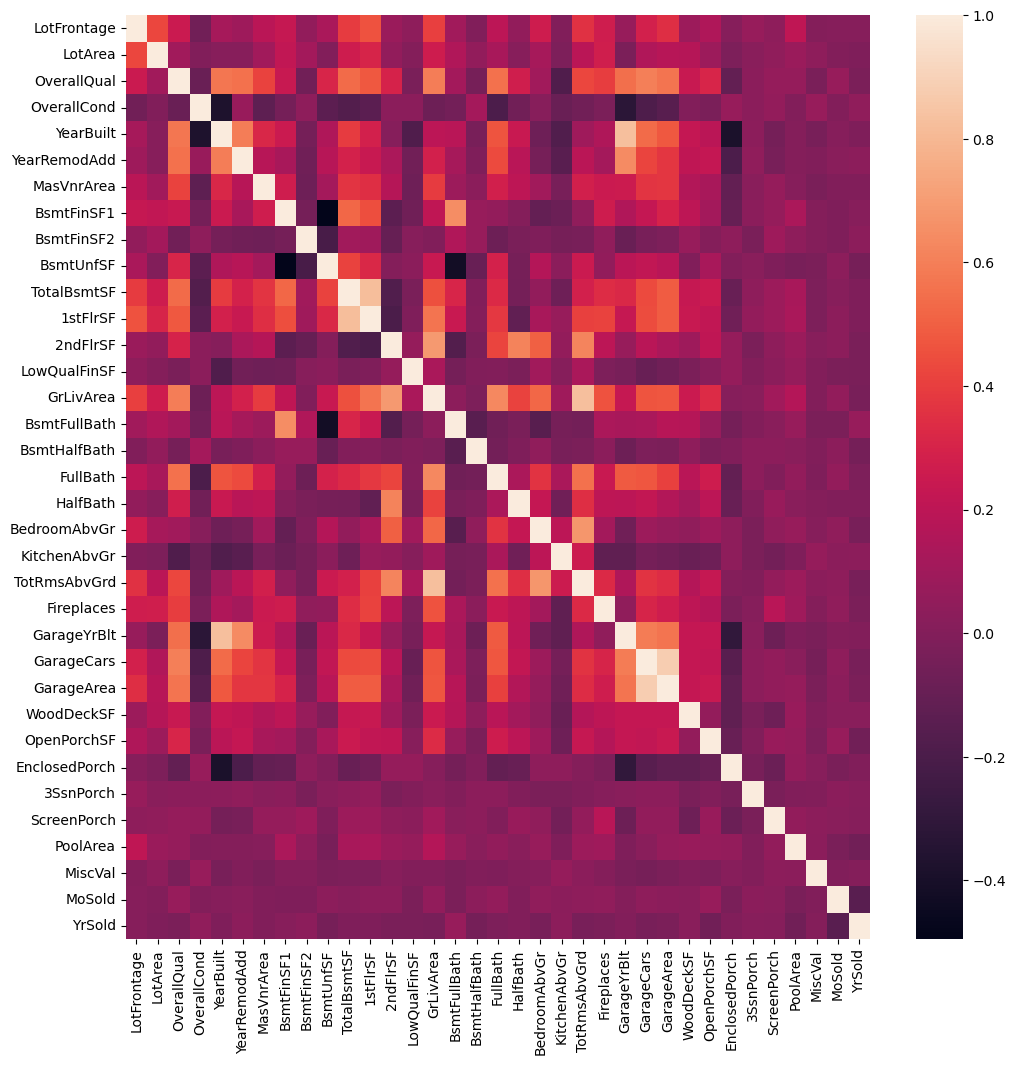

In [69]:
#numerical  corr
corrmat = df[num_list].corr()
plt.subplots(figsize = (12,12))
sns.heatmap(corrmat)
plt.show()


In [71]:
corrmat = df.corr()

/var/folders/lm/2lvn9wp16vs1_n464td4y5j8fh_gfn/T/ipykernel_86211/2179290573.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = df.corr()


In [80]:
df_float = df[df.select_dtypes(['float64','int64']).columns]
corrmat = df_float.corr()

In [123]:
#直接挑几个和y相关性高的，然后跑一下几种模型试试；
rel_col = corrmat['SalePrice'][abs(corrmat['SalePrice'])>0.4].index

df_res = df[rel_col]
df_res.head()

df_res.info()

df_res.to_excel('./na.xlsx')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   OverallQual   1460 non-null   int64  
 1   YearBuilt     1460 non-null   int64  
 2   YearRemodAdd  1460 non-null   int64  
 3   MasVnrArea    1452 non-null   float64
 4   ExterQual     1460 non-null   int64  
 5   BsmtQual      1423 non-null   float64
 6   TotalBsmtSF   1460 non-null   int64  
 7   HeatingQC     1460 non-null   int64  
 8   1stFlrSF      1460 non-null   int64  
 9   GrLivArea     1460 non-null   int64  
 10  FullBath      1460 non-null   int64  
 11  KitchenQual   1460 non-null   int64  
 12  TotRmsAbvGrd  1460 non-null   int64  
 13  Fireplaces    1460 non-null   int64  
 14  GarageYrBlt   1379 non-null   float64
 15  GarageCars    1460 non-null   int64  
 16  GarageArea    1460 non-null   int64  
 17  PoolQC        7 non-null      float64
 18  SalePrice     1460 non-null 

In [109]:
#方式一：直接删除na；首先要去掉poolqc
df_res_na = df_res.drop(axis=1, columns ='PoolQC').dropna()
#df_res.dropna()
df_res_na.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1341 entries, 0 to 1459
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   OverallQual   1341 non-null   int64  
 1   YearBuilt     1341 non-null   int64  
 2   YearRemodAdd  1341 non-null   int64  
 3   MasVnrArea    1341 non-null   float64
 4   ExterQual     1341 non-null   int64  
 5   BsmtQual      1341 non-null   float64
 6   TotalBsmtSF   1341 non-null   int64  
 7   HeatingQC     1341 non-null   int64  
 8   1stFlrSF      1341 non-null   int64  
 9   GrLivArea     1341 non-null   int64  
 10  FullBath      1341 non-null   int64  
 11  KitchenQual   1341 non-null   int64  
 12  TotRmsAbvGrd  1341 non-null   int64  
 13  Fireplaces    1341 non-null   int64  
 14  GarageYrBlt   1341 non-null   float64
 15  GarageCars    1341 non-null   int64  
 16  GarageArea    1341 non-null   int64  
 17  SalePrice     1341 non-null   int64  
dtypes: float64(3), int64(15)
mem

In [117]:
#方式二：fillna，用-1代替
df_res_na = df_res.fillna(-1)
df_res_na.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   OverallQual   1460 non-null   int64  
 1   YearBuilt     1460 non-null   int64  
 2   YearRemodAdd  1460 non-null   int64  
 3   MasVnrArea    1460 non-null   float64
 4   ExterQual     1460 non-null   int64  
 5   BsmtQual      1460 non-null   float64
 6   TotalBsmtSF   1460 non-null   int64  
 7   HeatingQC     1460 non-null   int64  
 8   1stFlrSF      1460 non-null   int64  
 9   GrLivArea     1460 non-null   int64  
 10  FullBath      1460 non-null   int64  
 11  KitchenQual   1460 non-null   int64  
 12  TotRmsAbvGrd  1460 non-null   int64  
 13  Fireplaces    1460 non-null   int64  
 14  GarageYrBlt   1460 non-null   float64
 15  GarageCars    1460 non-null   int64  
 16  GarageArea    1460 non-null   int64  
 17  PoolQC        1460 non-null   float64
 18  SalePrice     1460 non-null 

In [124]:
#方式三：用最常出现的代替
df_res_na = pd.read_excel('./na.xlsx')
df_res_na.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Unnamed: 0    1460 non-null   int64
 1   OverallQual   1460 non-null   int64
 2   YearBuilt     1460 non-null   int64
 3   YearRemodAdd  1460 non-null   int64
 4   MasVnrArea    1460 non-null   int64
 5   ExterQual     1460 non-null   int64
 6   BsmtQual      1460 non-null   int64
 7   TotalBsmtSF   1460 non-null   int64
 8   HeatingQC     1460 non-null   int64
 9   1stFlrSF      1460 non-null   int64
 10  GrLivArea     1460 non-null   int64
 11  FullBath      1460 non-null   int64
 12  KitchenQual   1460 non-null   int64
 13  TotRmsAbvGrd  1460 non-null   int64
 14  Fireplaces    1460 non-null   int64
 15  GarageYrBlt   1460 non-null   int64
 16  GarageCars    1460 non-null   int64
 17  GarageArea    1460 non-null   int64
 18  SalePrice     1460 non-null   int64
dtypes: int64(19)
memory usage: 

## train the model

In [125]:
y = df_res_na['SalePrice']
x = df_res_na.drop('SalePrice',axis = 1)

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 0)

In [126]:
def evaluate(y_test, y_pred):
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rsquare = r2_score(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared = False)
    
    try:
        rmsle = mean_squared_log_error(y_test, y_pred,squared = False)
    except:
        rmsle = np.nan
        
    return mae, mse, rsquare, rmse, rmsle

In [127]:
model_list = {
    'decision_tree_regression':DecisionTreeRegressor(random_state = 42),
    'linear_regression':LinearRegression(),
    'lasso_lars':LassoLars(alpha=41,eps=1.38,random_state = 42,normalize=False),
    'ridge_regression':Ridge(alpha=1778,random_state=42),
    'SVR': SVR(),
    'random_forest_regression':RandomForestRegressor(n_estimators=400,random_state = 42),
    'logistic_regression':LogisticRegression(random_state = 42),
    'bayesian_ridge':BayesianRidge(),
    'gradient_boosting':GradientBoostingRegressor(random_state = 42),
}

In [128]:

score = dict()

for key in model_list.keys():
    model = model_list[key].fit(x_train,y_train)
    y_pred = model.predict(x_test)
    score[key] =  evaluate(y_test,y_pred)
    
score_df = pd.DataFrame(score).T.round(2)
score_df.columns=['MAE','MSE','R2 Square','RMSE','RMSLE']

/Users/10019653/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [129]:
score_df
#fill na with most frequent value

,MAE,MSE,R2 Square,RMSE,RMSLE
decision_tree_regression,27344.71,2.056389e+09,0.70,45347.42,0.21
linear_regression,25088.27,2.327407e+09,0.66,48243.21,0.21
lasso_lars,25040.09,2.322910e+09,0.66,48196.58,0.21
ridge_regression,25884.78,2.712055e+09,0.61,52077.40,0.22
SVR,55528.37,7.238253e+09,-0.05,85077.92,0.39
random_forest_regression,19194.82,1.185599e+09,0.83,34432.53,0.15
logistic_regression,36408.53,2.648062e+09,0.62,51459.32,0.26
bayesian_ridge,24898.91,2.325048e+09,0.66,48218.75,0.21
gradient_boosting,18554.45,8.117242e+08,0.88,28490.77,0.14
